In [105]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

### Задача 1

Даны значения зарплат из выборки выпускников:

100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 230, 24, 57, 55, 70, 75, 65, 84, 90, 150

Своими руками (т.е. без использования статистических функций вроде mean, std, var) посчитать среднее арифметическое, смещённую и несмещённую оценки дисперсии, среднее квадратичное отклонение для данной выборки.

Можно затем посчитать те же значения с использованием статистических функций, чтобы проверить себя.

In [45]:
data = np.array([100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 230, 24, 57, 55, 70, 75, 65, 84, 90, 150])
mean = sum(data) / len(data)
off_var = (sum((data - mean)**2)) / len(data)
non_off_var = (sum((data - mean)**2)) / (len(data)-1)
std_ = np.sqrt(off_var)

In [52]:
print(f' среднее арифметическое: {mean} \n смещенная дисперсия: {off_var} \n несмещенная дисперсия: {non_off_var} \n среднее квадратичное отклонение: {std_}')

 среднее арифметическое: 73.14285714285714 
 смещенная дисперсия: 2135.074829931973 
 несмещенная дисперсия: 2241.8285714285716 
 среднее квадратичное отклонение: 46.20686994302874


### Задача 2

Для выборки из задачи 1 найти (также без использования статистических функций) медиану, первый и третий квартили, интерквартильное расстояние. Найти выбрoсы в выборке, используя для этого "усы" из boxplot.

В этой задаче неоднозначности в вычислении квантилей можно разрешать любым способом.

In [99]:
mediana = sorted(data)[len(sdata)//2]
first_quarter = sorted(data)[sorted(data).index(mediana) // 2]
third_quarter = sorted(data)[sorted(data).index(first_quarter) * 3]
inter_quarter = sorted(data)[sorted(data).index(first_quarter):sorted(data).index(third_quarter)]
print(f' медиана: {mediana} \n первый квартиль: {first_quarter} \n третий квартиль: {third_quarter} \n интерквартильное расстояние: {inter_quarter}')

 медиана: 70 
 первый квартиль: 45 
 третий квартиль: 84 
 интерквартильное расстояние: [45, 55, 57, 65, 65, 70, 75, 75, 77, 80]


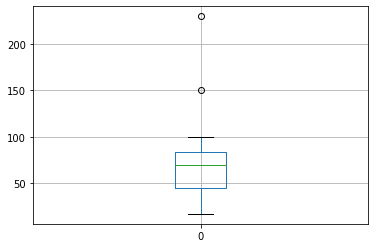

In [119]:
pd_data = pd.DataFrame(data)
pd_data.boxplot();

In [133]:
outliers = []
for i in data:
    if (i < first_quarter - (1.5 * (third_quarter - first_quarter))) or (i > third_quarter + (1.5 * (third_quarter - first_quarter))):
        outliers.append(i)
print('выбросы в данной выборке:', outliers)

выбросы в данной выборке: [230, 150]


### Задача 3

В университет на факультеты A и B поступило равное количество студентов, а на факультет C студентов поступило столько же, сколько на A и B вместе. Вероятность того, что студент факультета A сдаст первую сессию, равна 0.8. Для студента факультета B эта вероятность равна 0.7, а для студента факультета C - 0.9. Студент сдал первую сессию. Какова вероятность, что он учится: a) на факультете A? б) на факультете B? в) на факультете C?

Замечание: да, эта задача не на тему описательных статистик, но тема важная, и её стоит иногда освежать в памяти.

#### Предположим, что в факультеты A и B поступили по 100 студентов, а в факультет C 200.  Будем вычислять значения по формуле Байеса.
$$$$

$$ P(S|A) = 0.8 $$

$$ P(S|B) = 0.7 $$

$$ P(S|C) = 0.9 $$

$$ P(A|S) = \dfrac{P(S|A)P(A)}{P(S)} \ \ => \ \ \dfrac{0.8 * \dfrac{1}{4}}{0.8 * \dfrac{1}{4} + 0.7 * \dfrac{1}{4} + 0.9 * \dfrac{2}{4}} = 0.09195402298850576 $$
$$$$
$$ P(B|S) = \dfrac{P(S|B)P(B)}{P(S)} \ \ => \ \ \dfrac{0.7 * \dfrac{1}{4}}{0.8 * \dfrac{1}{4} + 0.7 * \dfrac{1}{4} + 0.9 * \dfrac{2}{4}} = 0.08045977011494253 $$
$$$$
$$ P(C|S) = \dfrac{P(S|C)P(C)}{P(S)} \ \ => \ \ \dfrac{0.9 * \dfrac{2}{4}}{0.8 * \dfrac{1}{4} + 0.7 * \dfrac{1}{4} + 0.9 * \dfrac{2}{4}} = 0.8275862068965518 $$